<a href="https://colab.research.google.com/github/evin76/machinelearning2024/blob/main/machinelearning2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Инокова Эвита 3824М1ФИ3


---


Выяснить, какие факторы имели наибольшее влияние на выживание в катастрофе.

https://www.kaggle.com/datasets/sakshisatre/titanic-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [4]:
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import fbeta_score

from sklearn.metrics import roc_curve

from sklearn.metrics import precision_recall_curve

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor

In [5]:
data = pd.read_csv("Titanic Dataset.csv")
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


**Pclass**: Ticket class indicating the socio-economic status of the passenger. It is categorized into three classes: 1 = Upper, 2 = Middle, 3 = Lower.

**Survived**: A binary indicator that shows whether the passenger survived (1) or not (0) during the Titanic disaster. This is the target variable for analysis.

**Name**: The full name of the passenger, including title (e.g., Mr., Mrs., etc.).

**Sex**: The gender of the passenger, denoted as either male or female.

**Age**: The age of the passenger in years.

**SibSp**: The number of siblings or spouses aboard the Titanic for the respective passenger.

**Parch**: The number of parents or children aboard the Titanic for the respective passenger.

**Ticket**: The ticket number assigned to the passenger.

**Fare**: The fare paid by the passenger for the ticket.

**Cabin**: The cabin number assigned to the passenger, if available.

**Embarked**: The port of embarkation for the passenger. It can take one of three values: C = Cherbourg, Q = Queenstown, S = Southampton.

**Boat**: If the passenger survived, this column contains the identifier of the lifeboat they were rescued in.

**Body**: If the passenger did not survive, this column contains the identification number of their recovered body, if applicable.

**Home.dest**: The destination or place of residence of the passenger.

In [6]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [7]:
data.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


Задача - выявить зависимость Survived (0, 1) от Pclass, Survived, Sex, Age, SibSp, Parch, Embarked

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [10]:
#Pclass, Survived, Sex, Age, SibSp, Parch
#Embarked?

In [11]:
data['survived'].value_counts()

,count
survived,
0,809
1,500


Подсчет пассажиров по возрасту

In [12]:
data['age'].value_counts()

,count
age,
24.00,47
22.00,43
21.00,41
30.00,40
18.00,39
...,...
0.33,1
22.50,1
70.50,1


Survived == 0
Диаграмма рассеивания: зависимость количества невыживших пассажиров от их возраста

In [13]:
age_not_survived = data[data['survived'] == 0]['age'].value_counts().reset_index()

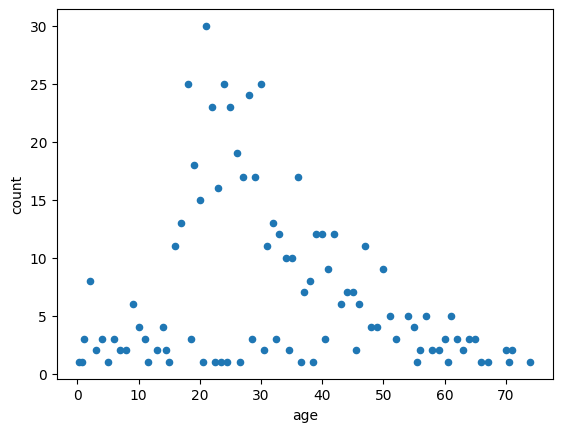

In [14]:
age_not_survived.plot(kind='scatter', x='age', y='count')
pass

Survived == 1
Такую же диаграмму построим для выживших пассажиров

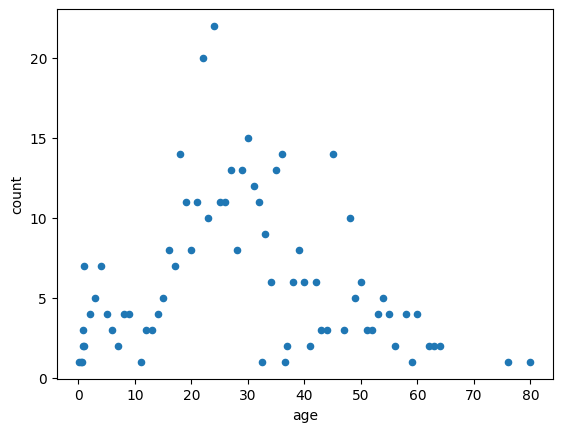

In [15]:
age_survived = data[data['survived'] == 1]['age'].value_counts().reset_index()
age_survived.plot(kind='scatter', x='age', y='count')
pass

Диаграмма рассеивания мало о чем говорит в данном случае, так как основная масса пассажиров - это молодые люди (20 - 40 лет), поэтому больше всего как выживших, так и погибших будут такого же возраста.

Подсчет пассажиров по полу

In [16]:
data['sex'].value_counts()

,count
sex,
male,843
female,466


In [17]:
data[data['survived'] == 0]['sex'].value_counts()

,count
sex,
male,682
female,127


In [18]:
data[data['survived'] == 1]['sex'].value_counts()

,count
sex,
female,339
male,161


Здесь видно, что из общего количества мужчин и женщин женщин выжило больше, хоть и изначально их было меньше.

Теперь сравним Pclass - это социо-экономический статус, есть три значения: 1 = Upper, 2 = Middle, 3 = Lower.

In [19]:
data['pclass'].value_counts()

,count
pclass,
3,709
1,323
2,277


In [20]:
data[data['survived'] == 0]['pclass'].value_counts()

,count
pclass,
3,528
2,158
1,123


In [21]:
data[data['survived'] == 1]['pclass'].value_counts()

,count
pclass,
1,200
3,181
2,119


Здесь можно наблюдать, что больше всего выжило в высшем классе.

Посмотрим зависимость пола от экономического класса

In [22]:
female_class = data[data['sex'] == 'female']['pclass'].value_counts().reset_index()
female_class

,pclass,count
0,3,216
1,1,144
2,2,106


In [23]:
male_class = data[data['sex'] == 'male']['pclass'].value_counts().reset_index()
male_class

,pclass,count
0,3,493
1,1,179
2,2,171


Сделаем признаки sex, embarked категориальными

In [24]:
data['sex'] = data['sex'].astype('category')
data['sex'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

In [25]:
data['embarked'] = data['embarked'].astype('category')
data['embarked'].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False, categories_dtype=object)

In [26]:
data.describe(include=['category'])

,sex,embarked
count,1309,1307
unique,2,3
top,male,S
freq,843,914


In [27]:
data.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [28]:
#data_cleaned = data[data['age'].notna()]
#data_cleaned = data_cleaned[data_cleaned['embarked'].notna()]
#data_cleaned.shape
data_cleaned = data

In [29]:
data_cleaned.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [30]:
#survived from sex
#survived from age
#survived from pclass
#survived from sibsp
#survived from parch

In [31]:
data_scatter = data_cleaned.drop(['name', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

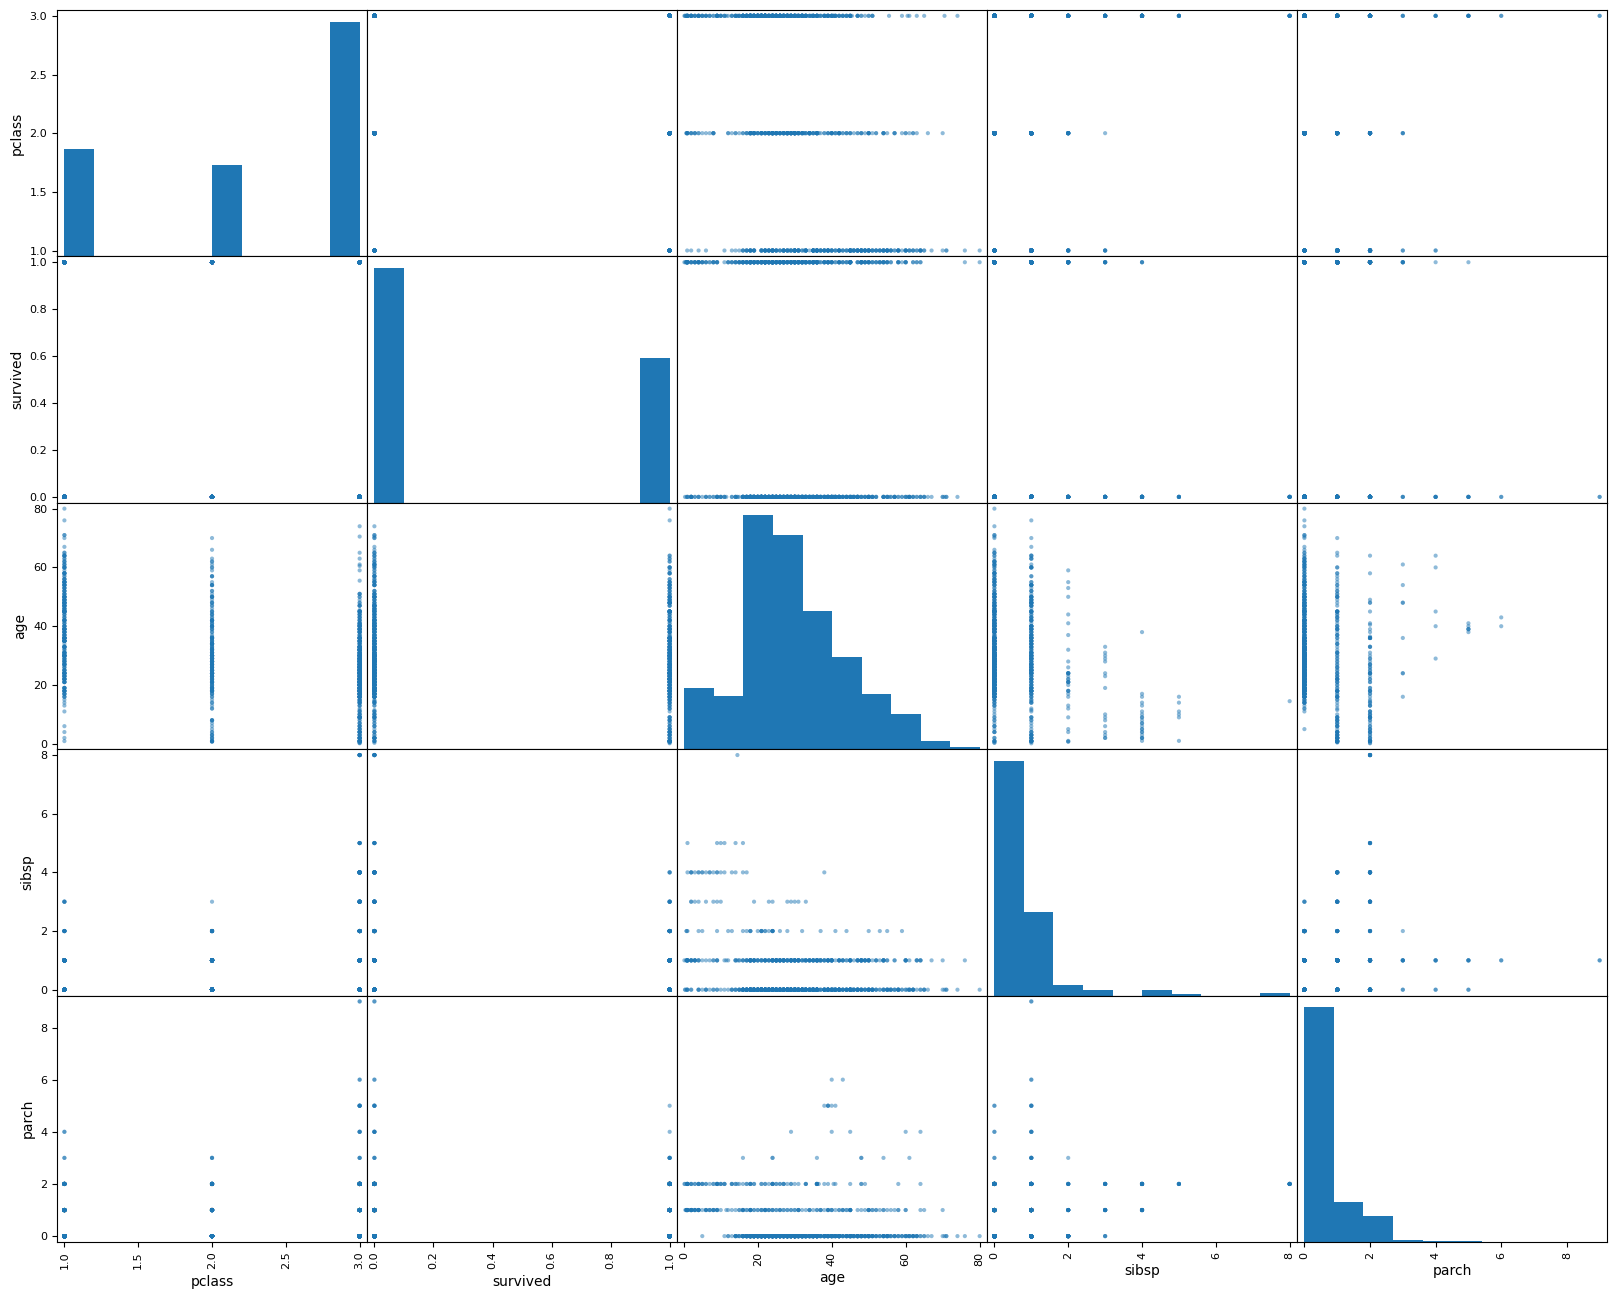

In [32]:
pd.plotting.scatter_matrix(data_scatter, figsize = (20, 16))
pass

In [33]:
data_cleaned['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,age
0.005,0.7500
0.010,0.9200
0.050,5.0000
0.100,14.0000
0.500,28.0000
0.900,50.0000
0.950,57.0000
0.990,65.0000
0.995,70.3875


**Значения в возрасте (age) меньше 1 должны быть приравнены к 0. Это значения квантилей 0.005 и 0.010**

In [34]:
data_cleaned.loc[data_cleaned['age'] < 1.0, 'age'] = 0

In [35]:
data_cleaned['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,age
0.005,0.0000
0.010,0.0000
0.050,5.0000
0.100,14.0000
0.500,28.0000
0.900,50.0000
0.950,57.0000
0.990,65.0000
0.995,70.3875


In [36]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(4), object(5)
memory usage: 125.7+ KB


In [37]:
data_cleaned['pclass'].value_counts()
#1 - Upper, 2 - Middle, 3 - Lower

,count
pclass,
3,709
1,323
2,277


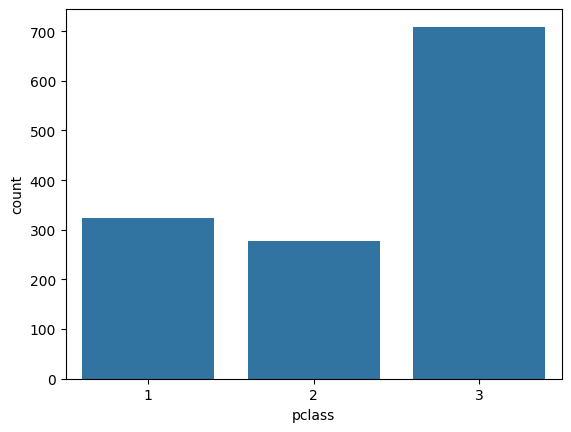

In [38]:
sns.countplot(x='pclass', data=data_cleaned)
pass

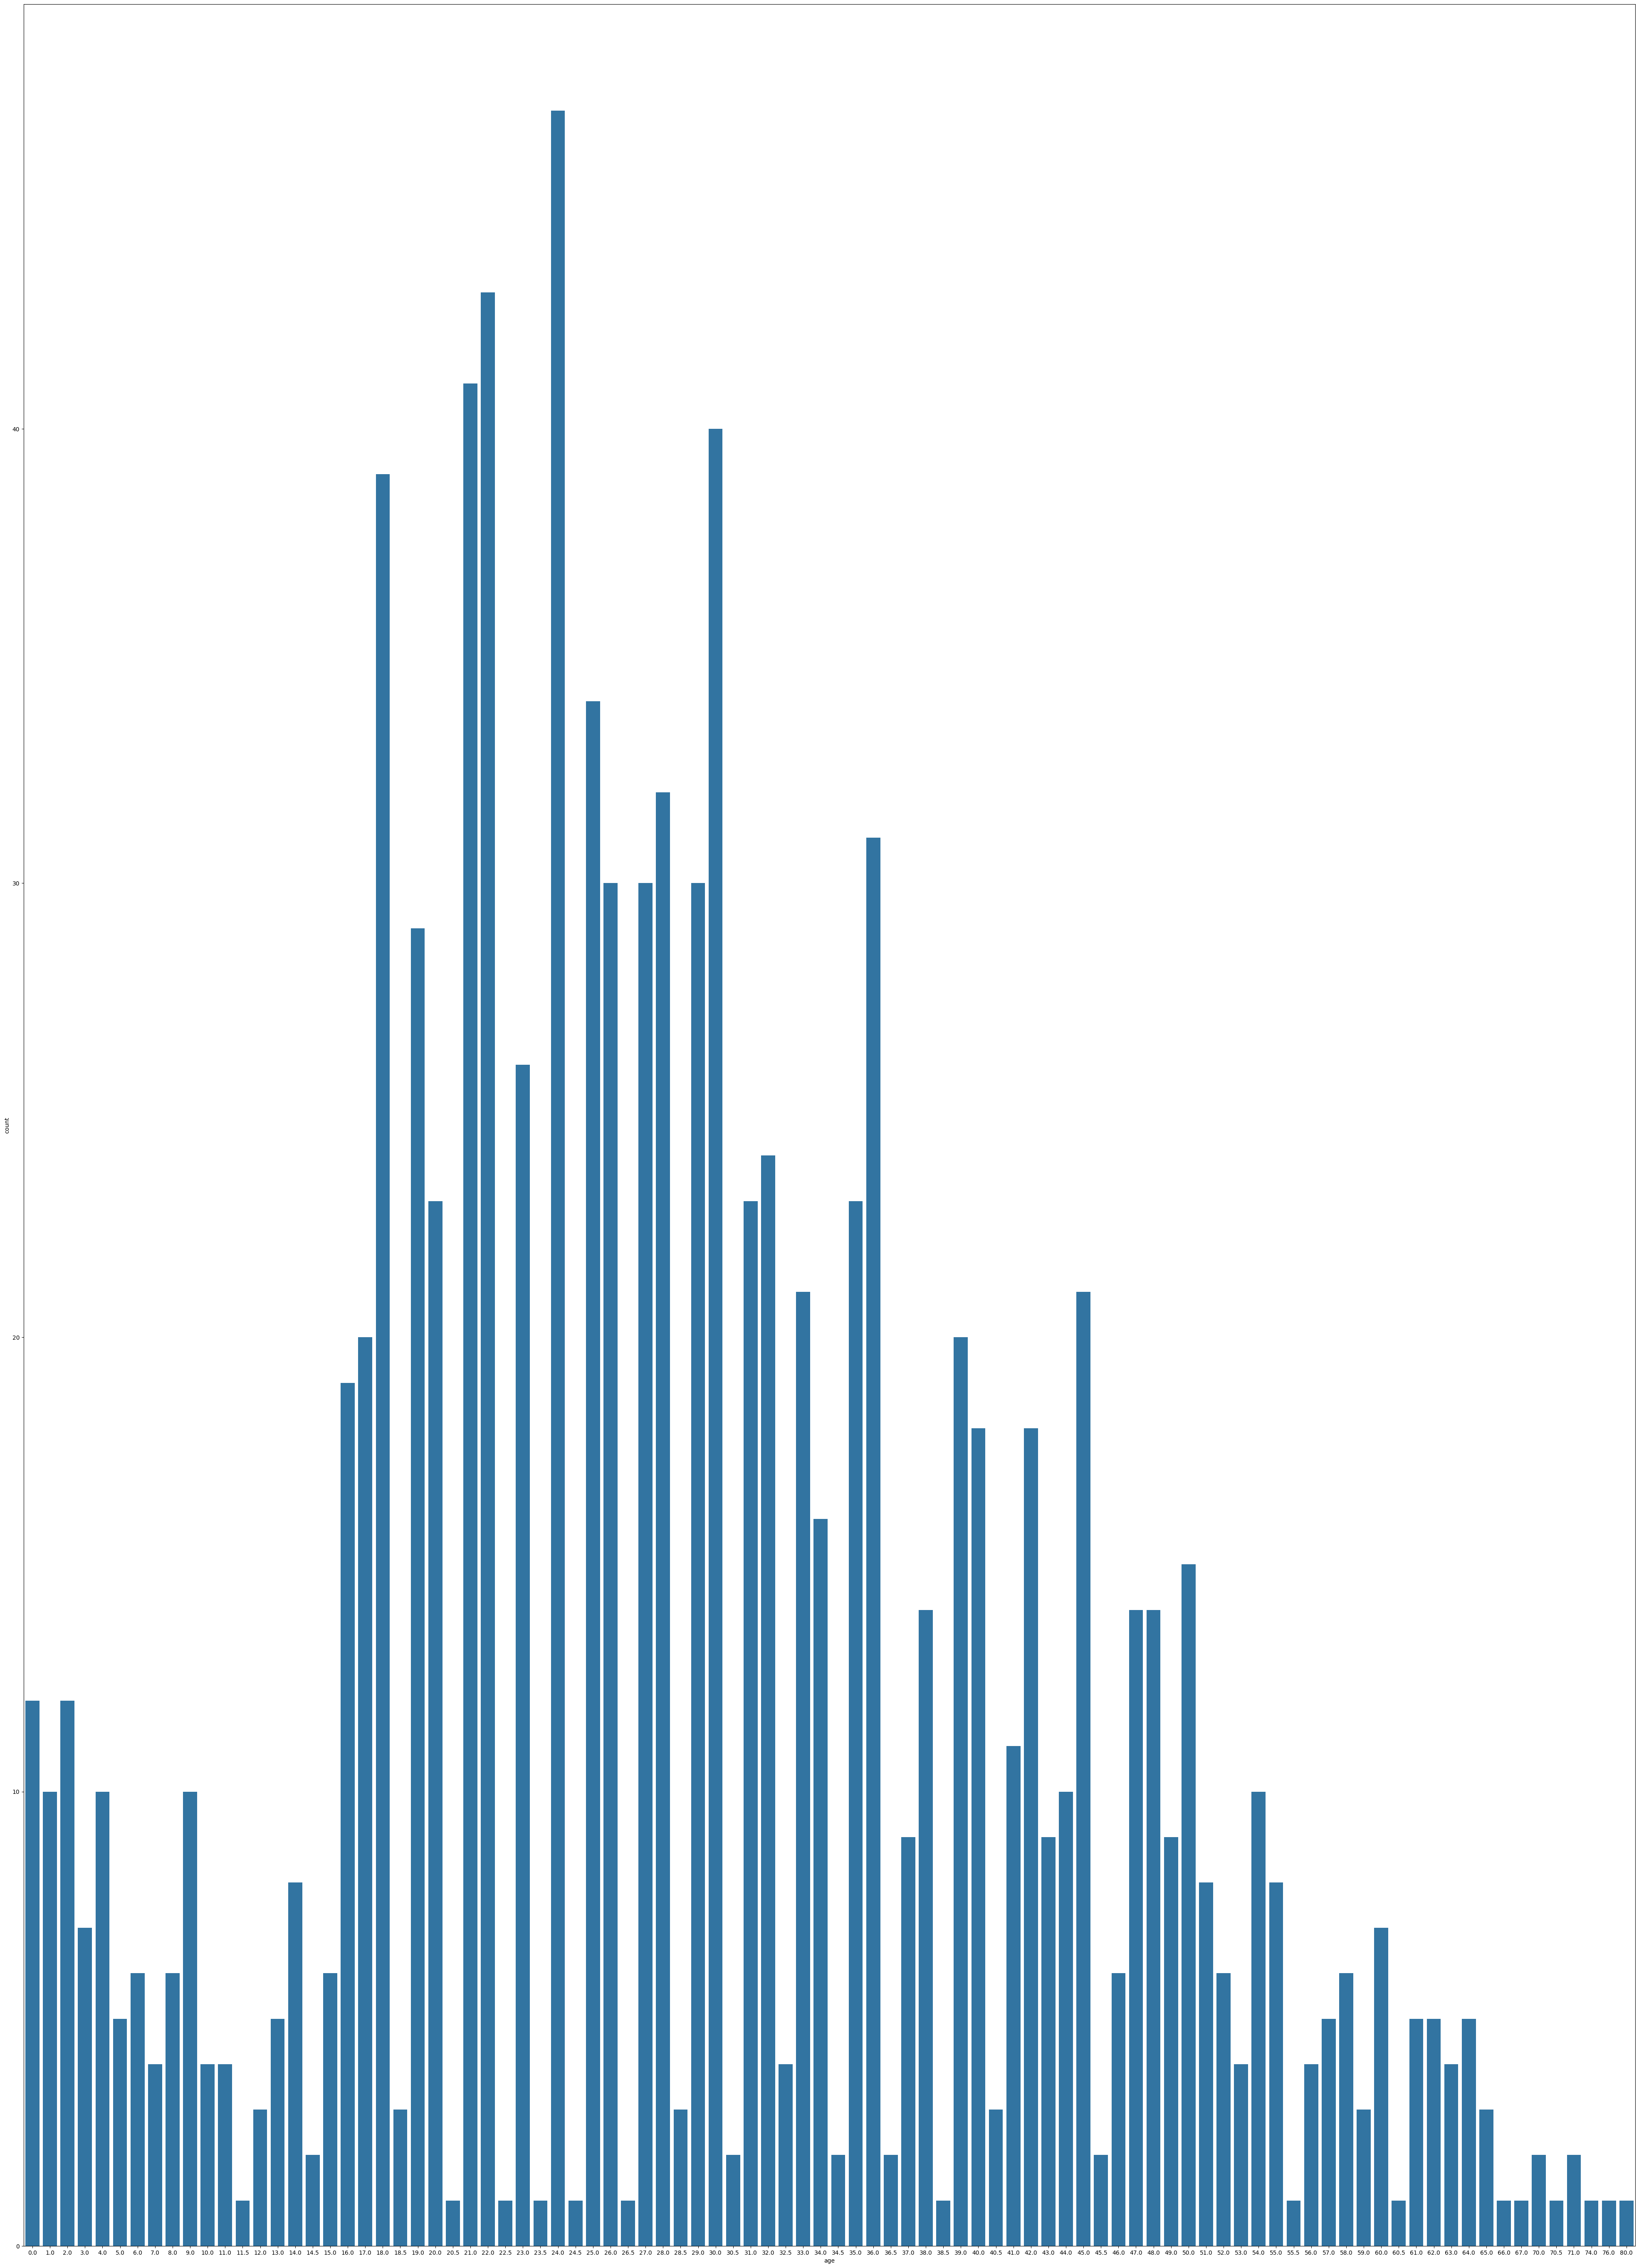

In [39]:
data_cleaned['age'].value_counts()
fig, ax = plt.subplots(figsize=(50, 70))
sns.countplot(x='age', data=data_cleaned, ax=ax)
pass

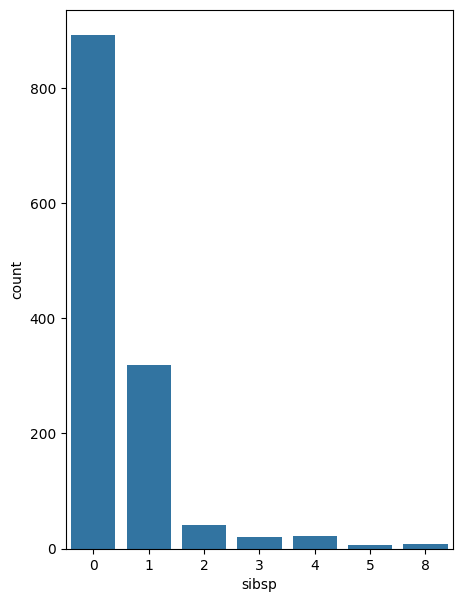

In [40]:
data_cleaned['sibsp'].value_counts()
fig, ax = plt.subplots(figsize=(5, 7))
sns.countplot(x='sibsp', data=data_cleaned, ax=ax)
pass

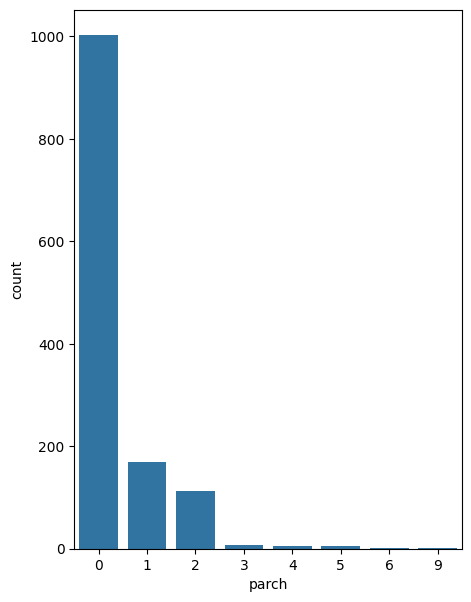

In [41]:
data_cleaned['parch'].value_counts()
fig, ax = plt.subplots(figsize=(5, 7))
sns.countplot(x='parch', data=data_cleaned, ax=ax)
pass

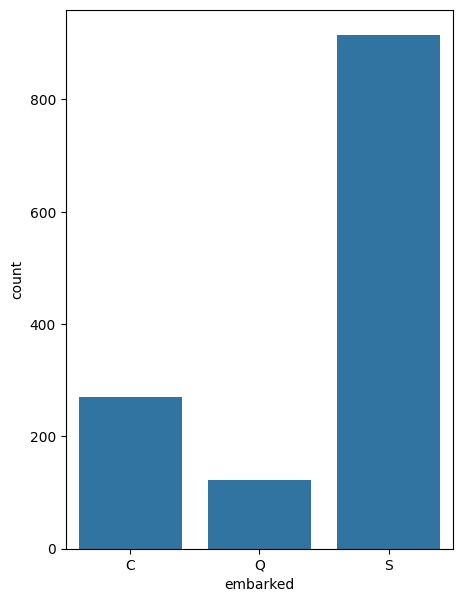

In [42]:
data_cleaned['embarked'].value_counts()
fig, ax = plt.subplots(figsize=(5, 7))
sns.countplot(x='embarked', data=data_cleaned, ax=ax)
pass

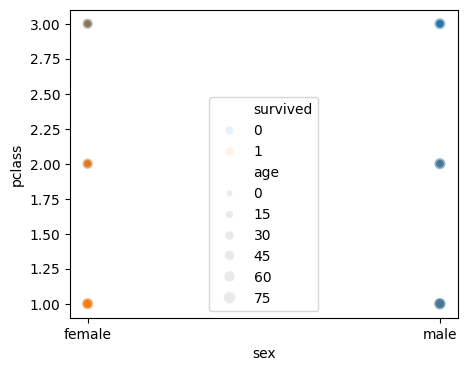

In [43]:
plt.figure(figsize = (5, 4))
sns.scatterplot(x='sex', y='pclass', size='age', hue='survived', data=data_cleaned, alpha=0.1)
#sns.scatterplot(x='sex', y='pclass', size='age', hue='survived', data=data_cleaned, alpha=0.1)
pass

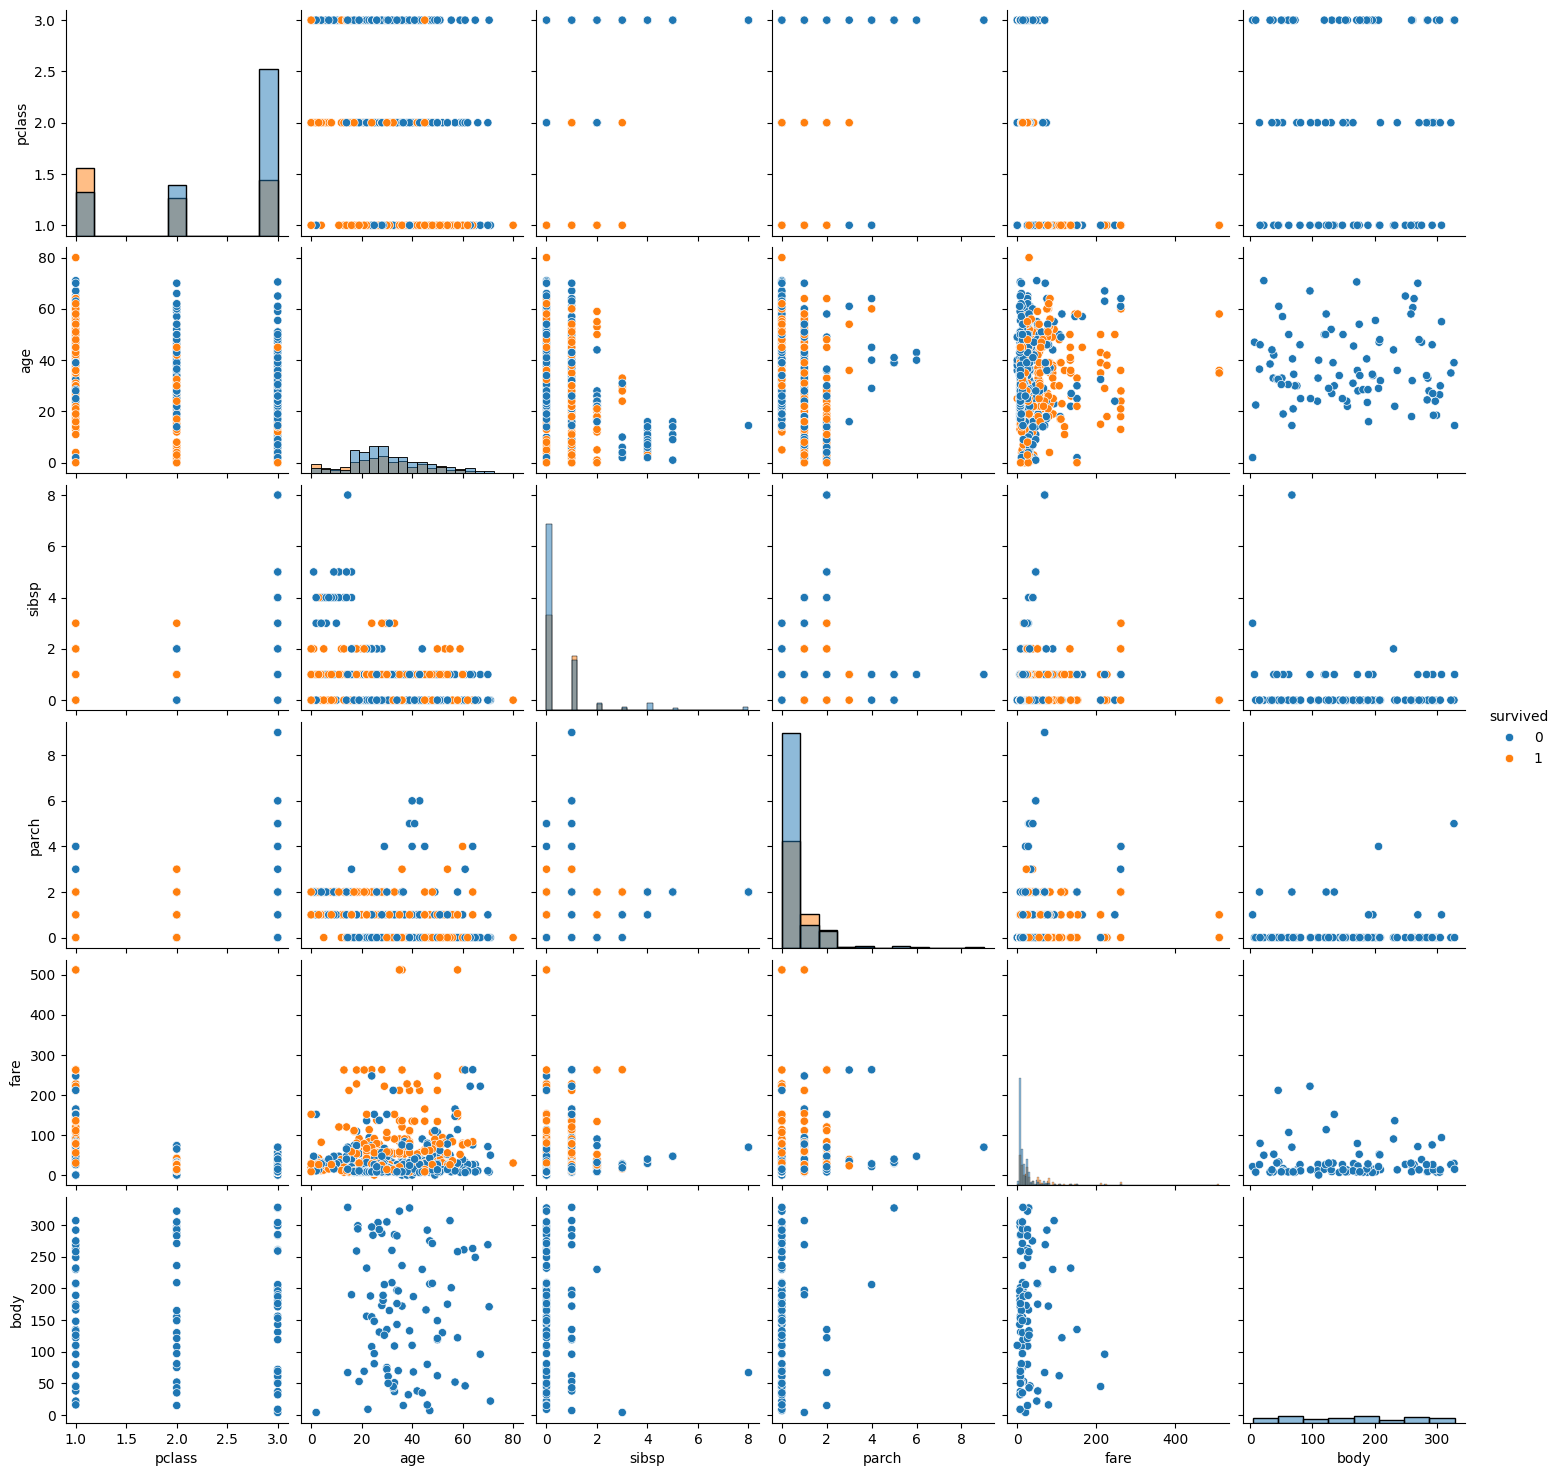

In [44]:
sns.pairplot(data_cleaned.sample(1000), hue='survived', diag_kind='hist')
pass

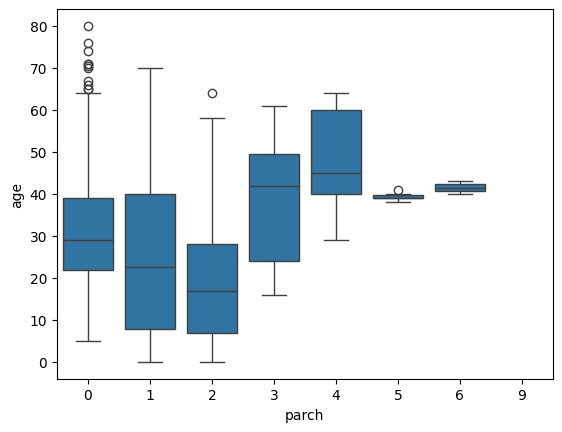

In [45]:
sns.boxplot(x="parch", y="age", data=data_cleaned)
pass

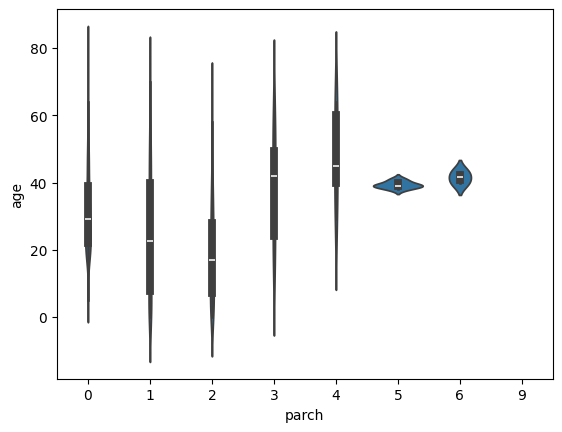

In [46]:
sns.violinplot(x="parch", y="age", data=data_cleaned)
pass

In [47]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.407763,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055957,-0.027825,0.082660,0.244265,NaN
age,-0.407763,-0.055957,1.000000,-0.243658,-0.151374,0.178573,0.058809
sibsp,0.060832,-0.027825,-0.243658,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.151374,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178573,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


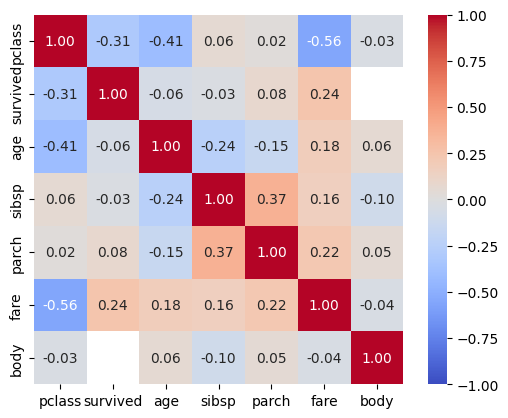

In [48]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [49]:
corr_mat > 0.5

,pclass,survived,age,sibsp,parch,fare,body
pclass,True,False,False,False,False,False,False
survived,False,True,False,False,False,False,False
age,False,False,True,False,False,False,False
sibsp,False,False,False,True,False,False,False
parch,False,False,False,False,True,False,False
fare,False,False,False,False,False,True,False
body,False,False,False,False,False,False,True


In [50]:
data['embarked'].unique()

['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']

**Обучающая и тестовая выборки**

In [51]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(4), object(5)
memory usage: 125.7+ KB


In [52]:
X = data_cleaned.drop(['name', 'survived', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
y = data_cleaned['survived']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(981, 328)

**Заполнение пропущенных значений**

In [54]:
X_train.isna().sum()

,0
pclass,0
sex,0
age,197
sibsp,0
parch,0
embarked,1


In [55]:
X_test.isna().sum()

,0
pclass,0
sex,0
age,66
sibsp,0
parch,0
embarked,1


Заполняем пропущенные значения age средними значениями

In [56]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_train[['age']])

SimpleImputer(strategy='median')

In [57]:
X_train[['age']] = imp_num.transform(X_train[['age']])

Заполняем пропущенные значения embarked самыми частотными

In [58]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_train[['embarked']])
X_train[['embarked']] = imp_cat.transform(X_train[['embarked']])

In [59]:
X_train.isna().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
embarked,0


In [60]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_test[['age']])
X_test[['age']] = imp_num.transform(X_test[['age']])

In [61]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_test[['embarked']])
X_test[['embarked']] = imp_cat.transform(X_test[['embarked']])

In [62]:
X_test.isna().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
embarked,0


**Бинаризация категориальных признаков**

In [63]:
#embarked, sex
#sex: male = 1, female = 0
#embarked:
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['sex']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [64]:
X_train.head()

,pclass,sex,age,sibsp,parch,embarked
1139,3,male,38.0,0,0,S
678,3,male,6.0,1,1,C
290,1,male,52.0,1,1,S
285,1,male,67.0,1,0,S
1157,3,male,18.0,1,1,S


In [65]:
dummies = pd.DataFrame(enc.transform(X_train[['sex']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)

In [66]:
dummies.tail()

,sex_male
1095,0.0
1130,0.0
1294,1.0
860,0.0
1126,0.0


In [67]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['sex'], axis=1)

In [68]:
X_train.tail()

,pclass,age,sibsp,parch,embarked,sex_male
1095,3,28.0,0,0,Q,0.0
1130,3,18.0,0,0,S,0.0
1294,3,28.5,0,0,S,1.0
860,3,26.0,0,0,S,0.0
1126,3,28.0,0,0,S,0.0


In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 1139 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    981 non-null    int64  
 1   age       981 non-null    float64
 2   sibsp     981 non-null    int64  
 3   parch     981 non-null    int64  
 4   embarked  981 non-null    object 
 5   sex_male  981 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 53.6+ KB


In [70]:
enc.fit(X_train[['embarked']])
dummies = pd.DataFrame(enc.transform(X_train[['embarked']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)

In [71]:
dummies.head()

,embarked_C,embarked_Q,embarked_S
1139,0.0,0.0,1.0
678,1.0,0.0,0.0
290,0.0,0.0,1.0
285,0.0,0.0,1.0
1157,0.0,0.0,1.0


In [72]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['embarked'], axis=1)
X_train.head()

,pclass,age,sibsp,parch,sex_male,embarked_C,embarked_Q,embarked_S
1139,3,38.0,0,0,1.0,0.0,0.0,1.0
678,3,6.0,1,1,1.0,1.0,0.0,0.0
290,1,52.0,1,1,1.0,0.0,0.0,1.0
285,1,67.0,1,0,1.0,0.0,0.0,1.0
1157,3,18.0,1,1,1.0,0.0,0.0,1.0


In [73]:
enc.fit(X_test[['sex', 'embarked']])
enc.fit(X_test[['sex', 'embarked']])
dummies = pd.DataFrame(enc.transform(X_test[['sex', 'embarked']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['sex', 'embarked'], axis=1)
X_test.head()

,pclass,age,sibsp,parch,sex_male,embarked_C,embarked_Q,embarked_S
1148,3,35.0,0,0,1.0,0.0,0.0,1.0
1049,3,20.0,1,1,1.0,1.0,0.0,0.0
982,3,30.0,0,0,1.0,0.0,0.0,1.0
808,3,30.0,0,0,1.0,0.0,0.0,1.0
1195,3,30.0,0,0,1.0,0.0,1.0,0.0


**Масштабирование количественных признаков**

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 1139 to 1126
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      981 non-null    float64
 1   age         981 non-null    float64
 2   sibsp       981 non-null    float64
 3   parch       981 non-null    float64
 4   sex_male    981 non-null    float64
 5   embarked_C  981 non-null    float64
 6   embarked_Q  981 non-null    float64
 7   embarked_S  981 non-null    float64
dtypes: float64(8)
memory usage: 69.0 KB


In [76]:
X_train.describe()

,pclass,age,sibsp,parch,sex_male,embarked_C,embarked_Q,embarked_S
count,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02
mean,-4.345827e-17,3.621523e-18,9.053807e-18,-1.810761e-17,-9.415959e-17,5.432284e-17,-3.621523e-18,-6.066050e-17
std,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00
min,-1.549072e+00,-2.294327e+00,-4.983125e-01,-4.330061e-01,-1.348690e+00,-5.012739e-01,-3.274500e-01,-1.536095e+00
25%,-3.562621e-01,-5.579839e-01,-4.983125e-01,-4.330061e-01,-1.348690e+00,-5.012739e-01,-3.274500e-01,-1.536095e+00
50%,8.365473e-01,-8.443574e-02,-4.983125e-01,-4.330061e-01,7.414601e-01,-5.012739e-01,-3.274500e-01,6.510012e-01
75%,8.365473e-01,4.285747e-01,4.399688e-01,-4.330061e-01,7.414601e-01,-5.012739e-01,-3.274500e-01,6.510012e-01
max,8.365473e-01,4.019648e+00,7.007939e+00,9.522751e+00,7.414601e-01,1.994917e+00,3.053902e+00,6.510012e-01


In [77]:
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [78]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 1148 to 533
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      328 non-null    float64
 1   age         328 non-null    float64
 2   sibsp       328 non-null    float64
 3   parch       328 non-null    float64
 4   sex_male    328 non-null    float64
 5   embarked_C  328 non-null    float64
 6   embarked_Q  328 non-null    float64
 7   embarked_S  328 non-null    float64
dtypes: float64(8)
memory usage: 23.1 KB


In [79]:
X_test.describe()

,pclass,age,sibsp,parch,sex_male,embarked_C,embarked_Q,embarked_S
count,3.280000e+02,3.280000e+02,3.280000e+02,3.280000e+02,3.280000e+02,3.280000e+02,3.280000e+02,3.280000e+02
mean,-1.543481e-16,7.040439e-17,-8.123583e-18,4.332578e-17,3.926399e-17,-2.707861e-17,-4.874150e-17,8.529762e-17
std,1.001528e+00,1.001528e+00,1.001528e+00,1.001528e+00,1.001528e+00,1.001528e+00,1.001528e+00,1.001528e+00
min,-1.537367e+00,-2.312943e+00,-4.201862e-01,-4.964955e-01,-1.334039e+00,-5.350463e-01,-3.055050e-01,-1.499175e+00
25%,-3.396084e-01,-5.324337e-01,-4.201862e-01,-4.964955e-01,-1.334039e+00,-5.350463e-01,-3.055050e-01,-1.499175e+00
50%,8.581502e-01,-8.730646e-02,-4.201862e-01,-4.964955e-01,7.496031e-01,-5.350463e-01,-3.055050e-01,6.670337e-01
75%,8.581502e-01,3.578208e-01,6.239128e-01,-4.964955e-01,7.496031e-01,-5.350463e-01,-3.055050e-01,6.670337e-01
max,8.581502e-01,2.954396e+00,7.932606e+00,6.288943e+00,7.496031e-01,1.868997e+00,3.273268e+00,6.670337e-01


**Обучаем KNN модель**

In [80]:
#Pclass, Survived, Sex, Age, SibSp, Parch
#Embarked?

knn = KNeighborsClassifier(n_neighbors=16, p=1)
knn.fit(X_train, y_train)
y_pred_knn_train = knn.predict(X_train)
print("Accuracy train:", accuracy_score(y_train, y_pred_knn_train))
print(classification_report(y_train, y_pred_knn_train))

Accuracy train: 0.8246687054026504
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       625
           1       0.81      0.67      0.74       356

    accuracy                           0.82       981
   macro avg       0.82      0.79      0.80       981
weighted avg       0.82      0.82      0.82       981



RSS - Остаточная сумма квадратов (residual sum of squares)

In [81]:
RSS = ((y_pred_knn_train - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(0.17533129459734964, 0.4187257988198836)

**Тестируем KNN модель**

In [82]:
#knn = KNeighborsClassifier(n_neighbors=2, p=1)
#knn.fit(X_test, y_test)
y_pred_knn_test = knn.predict(X_test)
print("Accuracy test:", accuracy_score(y_test, y_pred_knn_test))
print(classification_report(y_test, y_pred_knn_test))

Accuracy test: 0.7926829268292683
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       184
           1       0.87      0.62      0.72       144

    accuracy                           0.79       328
   macro avg       0.81      0.77      0.78       328
weighted avg       0.81      0.79      0.79       328



In [83]:
RSS = ((y_pred_knn_test - y_test)**2).sum()
RSS/N_test, (RSS/N_test)**.5

(0.2073170731707317, 0.45532084640474313)

In [84]:
print(np.mean(y_pred_knn_train != y_train))   # Ошибка на обучающей выборке
print(np.mean(y_pred_knn_test != y_test)) # Ошибка на тестовой выборке

0.17533129459734964
0.2073170731707317


**Измеряем метрики качества**

MSE - средняя сумма квадратов отклонений
R^2 - Коэффициент детерминации, или коэффициент регрессии Пирсона — доля объясняемого регрессией разброса относительно среднего (чем ближе к 1, тем модель лучше объясняет данные).

In [85]:
MSE_train = mean_squared_error(y_train, y_pred_knn_train)
MSE_test  = mean_squared_error(y_test,  y_pred_knn_test)

MSE_train, MSE_test

(0.17533129459734964, 0.2073170731707317)

In [86]:
knn.score(X_train, y_train)

0.8246687054026504

In [87]:
knn.score(X_test, y_test)

0.7926829268292683

In [88]:
MSE_train = ((y_pred_knn_train - y_train)**2).mean()
MSE_test  = ((y_pred_knn_test - y_test)**2).mean()
MSE_train, MSE_test

(0.17533129459734964, 0.2073170731707317)

Среднеквадратическая ошибка (RMSE - Rooted Mean Squared Error)

In [89]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(0.4187257988198836, 0.45532084640474313)

In [90]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['KNN, all features', :] = (RMSE_train, RMSE_test)

In [91]:
RMSE_table

,train,test
"KNN, all features",0.418726,0.455321


In [92]:
cm = confusion_matrix(y_train, y_pred_knn_train)

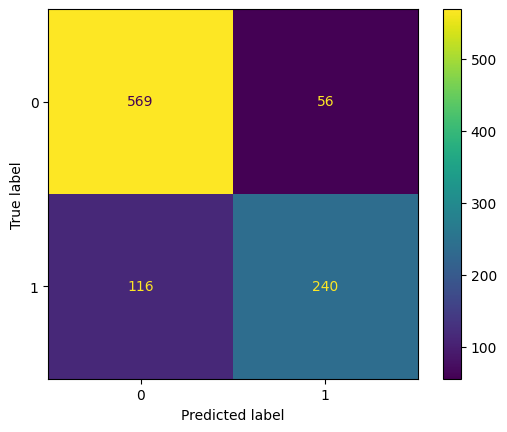

In [93]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#fig, ax = plt.subplots(figsize=(15,15))
disp.plot()
plt.show()

In [94]:
k_values = range(1, 101)
train_err = []
test_err = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_err.append(1 - model.score(X_train, y_train))
    test_err.append(1 - model.score(X_test, y_test))

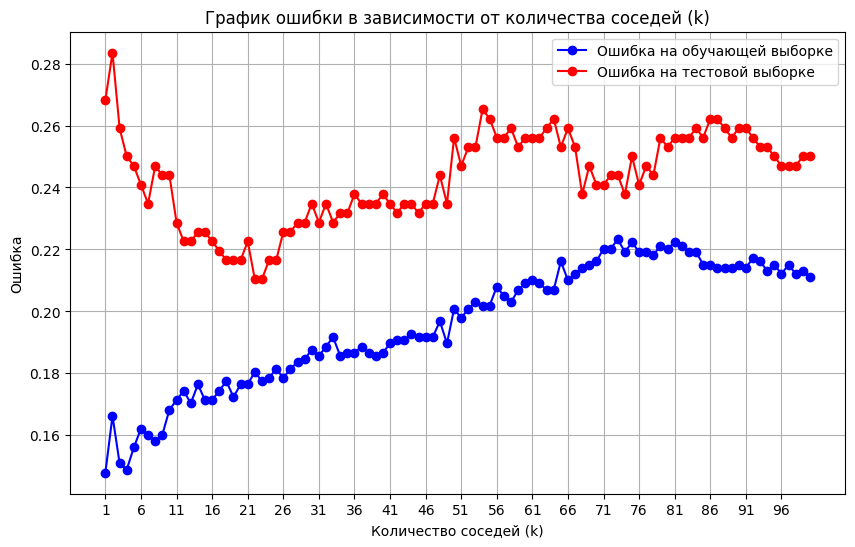

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_err, marker='o', color='blue', label='Ошибка на обучающей выборке')
plt.plot(k_values, test_err, marker='o', color='red', label='Ошибка на тестовой выборке')
plt.title('График ошибки в зависимости от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Ошибка')
plt.xticks(np.arange(1, 101, step=5))
plt.grid()
plt.legend()
plt.show()

Кривая ошибок: зависимость верно классифицированных объектов от объектов попадающих под ошибку 1 рода

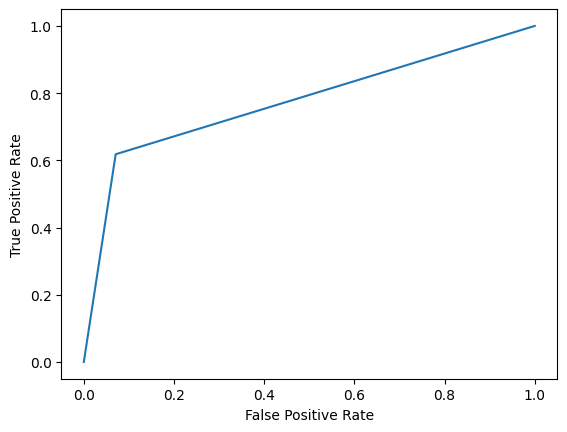

In [96]:
fprate, tprate, thresholds = roc_curve(y_test, y_pred_knn_test, pos_label=1)
plt.plot(fprate, tprate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<p>Precision == Точность </p>
<p> The ratio of correctly predicted positive observations to all predicted positives is known as precision.</p>

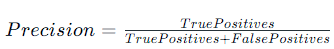

<p>Recall</p>
<p>The ratio of correctly predicted positive observations to the total number of actual positive observations is known as recall.</p>

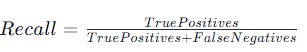

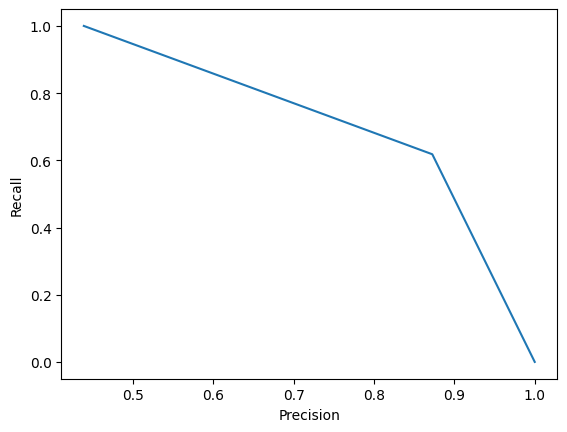

In [97]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_knn_test, pos_label=1)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

**Logistic Regression**

In [98]:
logistic_model = LogisticRegression(solver='lbfgs', max_iter=150)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [99]:
y_pred_logistic_model_train = logistic_model.predict(X_train)
print("Accuracy train:", accuracy_score(y_train, y_pred_logistic_model_train))
print(classification_report(y_train, y_pred_logistic_model_train))

Accuracy train: 0.7981651376146789
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       625
           1       0.74      0.69      0.71       356

    accuracy                           0.80       981
   macro avg       0.78      0.78      0.78       981
weighted avg       0.80      0.80      0.80       981



In [100]:
y_pred_logistic_model_test = logistic_model.predict(X_test)
print("Accuracy test:", accuracy_score(y_test, y_pred_logistic_model_test))
print(classification_report(y_test, y_pred_logistic_model_test))

Accuracy test: 0.7865853658536586
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       184
           1       0.83      0.65      0.73       144

    accuracy                           0.79       328
   macro avg       0.80      0.77      0.78       328
weighted avg       0.79      0.79      0.78       328



In [101]:
print(np.mean(y_pred_logistic_model_train != y_train))   # Ошибка на обучающей выборке
print(np.mean(y_pred_logistic_model_test != y_test)) # Ошибка на тестовой выборке

0.2018348623853211
0.21341463414634146


**Машина опорных векторов**

In [102]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [103]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [104]:
print("Accuracy train:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Accuracy train: 0.8267074413863404
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       625
           1       0.84      0.64      0.73       356

    accuracy                           0.83       981
   macro avg       0.83      0.79      0.80       981
weighted avg       0.83      0.83      0.82       981



In [105]:
print("Accuracy test:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy test: 0.7865853658536586
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       184
           1       0.89      0.59      0.71       144

    accuracy                           0.79       328
   macro avg       0.82      0.77      0.77       328
weighted avg       0.81      0.79      0.78       328



In [106]:
print(np.mean(y_train_pred != y_train))   # Ошибка на обучающей выборке
print(np.mean(y_test_pred != y_test)) # Ошибка на тестовой выборке

0.17329255861365953
0.21341463414634146


**Все ошибки**

<p>KNN ошибки: на обучении - 0.17, на тесте - 0.20</p>
<p>Логистическая регрессия: на обучении - 0.20, на тесте - 0.21</p>
<p>Машина опорных векторов: на обучении - 0.17, на тесте - 0.21</p>